# Testing out datetime features

In [91]:
from datetime import datetime

In [92]:
my_year = 2021
my_month = 8
my_day = 27
my_hour = 19
my_min = 11
my_sec = 30


In [93]:
my_date = datetime(my_year, my_month, my_day)
my_date

datetime.datetime(2021, 8, 27, 0, 0)

In [94]:
import numpy as np

In [95]:
np.array(['2020-03-15', '2020-03-16', '2020-03-17'], dtype='datetime64[s]')

array(['2020-03-15T00:00:00', '2020-03-16T00:00:00',
       '2020-03-17T00:00:00'], dtype='datetime64[s]')

In [96]:
np.arange('2018-06-01', '2018-06-23', 7, dtype='datetime64[D]')

array(['2018-06-01', '2018-06-08', '2018-06-15', '2018-06-22'],
      dtype='datetime64[D]')

In [97]:
import pandas as pd

In [98]:
pd.date_range('2020-01-01', periods=7, freq='D')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [99]:
pd.to_datetime(['1/2/2018', 'Jan 03, 2018'])

DatetimeIndex(['2018-01-02', '2018-01-03'], dtype='datetime64[ns]', freq=None)

In [100]:
df1 = pd.read_csv('/content/starbucks.csv', index_col = 'Date', parse_dates=True)
df1

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548
...,...,...
2018-12-24,60.5600,6323252
2018-12-26,63.0800,16646238
2018-12-27,63.2000,11308081


In [101]:
df1.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

Testing out time series operations

In [102]:
df1.resample(rule='A').mean()

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


In [103]:
def first_day(entry):
  if len(entry):
    return entry[0]

In [104]:
df1.resample(rule='A').apply(first_day)

,Close,Volume
Date,,
2015-12-31,38.0061,6906098
2016-12-31,55.0780,13521544
2017-12-31,53.1100,7809307
2018-12-31,56.3243,7215978


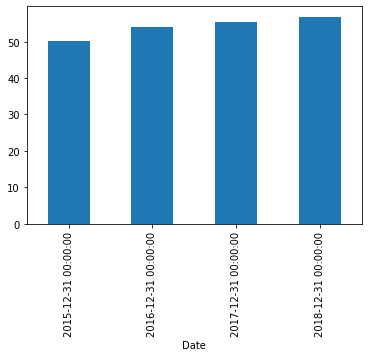

In [105]:
df1['Close'].resample(rule='A').mean().plot.bar()

In [106]:
df1.shift(-1)

,Close,Volume
Date,,
2015-01-02,37.2781,11623796.0
2015-01-05,36.9748,7664340.0
2015-01-06,37.8848,9732554.0
2015-01-07,38.4961,13170548.0
2015-01-08,37.2361,27556706.0
...,...,...
2018-12-24,63.0800,16646238.0
2018-12-26,63.2000,11308081.0
2018-12-27,63.3900,7712127.0


In [107]:
df1.shift(periods=1, freq='M')

,Close,Volume
Date,,
2015-01-31,38.0061,6906098
2015-01-31,37.2781,11623796
2015-01-31,36.9748,7664340
2015-01-31,37.8848,9732554
2015-01-31,38.4961,13170548
...,...,...
2018-12-31,60.5600,6323252
2018-12-31,63.0800,16646238
2018-12-31,63.2000,11308081


# Testing out Simple Moving Average (SMA), Hodrick-Prescott (HP), and ETS decomposition filters to check for trend, cycles, seasonality, and noise

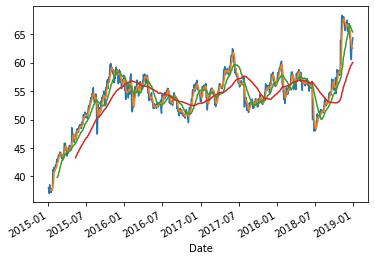

In [108]:
df1['Close'].plot()
df1.rolling(window=7).mean()['Close'].plot()
df1.rolling(window=30).mean()['Close'].plot()
df1.rolling(window=90).mean()['Close'].plot()

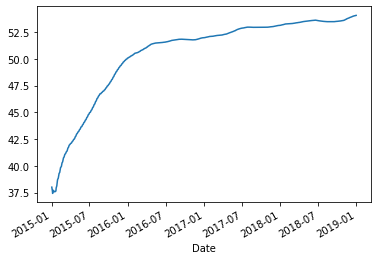

In [109]:
df1['Close'].expanding().mean().plot()

In [110]:
import numpy as np
import pandas as pd
%matplotlib inline

In [111]:
df = pd.read_csv('/content/macrodata.csv', index_col=0, parse_dates=True)
df

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-09-30,2008,3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
2008-12-31,2008,4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
2009-03-31,2009,1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
2009-06-30,2009,2,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


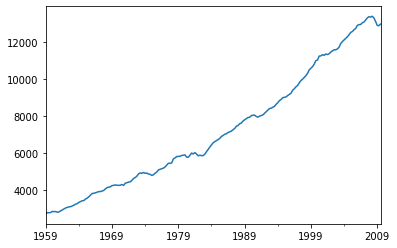

In [112]:
df['realgdp'].plot()

In [113]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [114]:
gdp_cycle, gdp_trend = hpfilter(df['realgdp'], lamb=1600)

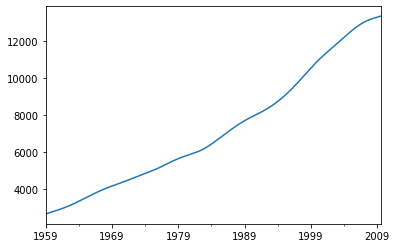

In [115]:
gdp_trend.plot()

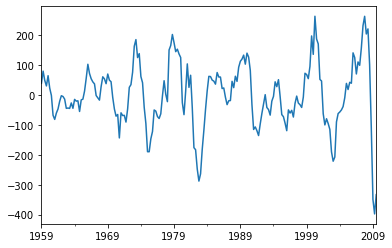

In [116]:
gdp_cycle.plot()

In [117]:
df2 = pd.read_csv('/content/airline_passengers.csv', index_col='Month', parse_dates=True)

In [118]:
df2.dropna(inplace=True)

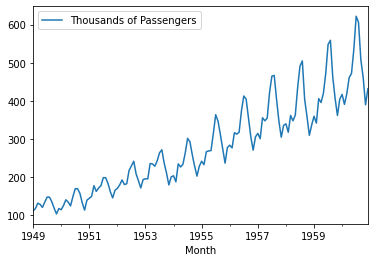

In [119]:
df2.plot()

In [120]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df2['Thousands of Passengers'], model='multiplicative')

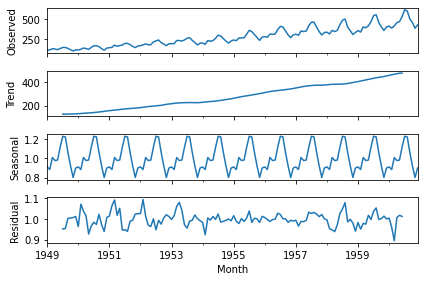

In [121]:
result.plot();

# Exponential Smoothing & Holt-Winters Methods

Apply Exponentially Weighted Moving Average (EWMA) filter over SMA as it provides greater weight to more recent observations through the lambda smoothing term,

In [122]:
import matplotlib.pyplot as plt

In [123]:
df2.index = pd.to_datetime(df2.index)

In [124]:
df2.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [125]:
df2['EWMA-12'] = df2['Thousands of Passengers'].ewm(span=12).mean()

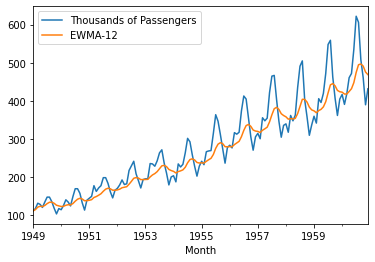

In [126]:
df2[['Thousands of Passengers', 'EWMA-12']].plot()

In [127]:
# Set index frequency for holt-winters to compute seasonality effects 
df2.index.freq = 'MS'

Apply simple or single exponential smoothing to account for level (mean). Equivalent to EWMA as it only considers previous time steps adjusted by an exponentially-scaled factor to prioritise recent data points.

In [128]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

Apply double exponential smoothing (Holt's method) to account for trend. For series with a linear trend, use additive equation for fitting. For series with an exponential trend, use multiplicative equation for fitting. The trend gets updated according to a recurrence equation fitted by a variable beta. 

In [135]:
df2['DES_add_12'] = ExponentialSmoothing(df2['Thousands of Passengers'], trend='add').fit().fittedvalues.shift(-1)
df2['DES_mul_12'] = ExponentialSmoothing(df2['Thousands of Passengers'], trend='mul').fit().fittedvalues.shift(-1)

In [136]:
df2.head()

,Thousands of Passengers,EWMA-12,DES_add_12,DES_mul_12
Month,,,,
1949-01-01,112,112.000000,114.336233,112.049247
1949-02-01,118,115.250000,120.336233,118.051885
1949-03-01,132,121.787529,134.336233,132.058041
1949-04-01,129,124.064224,131.336233,129.056722
1949-05-01,121,123.231685,123.336233,121.053204


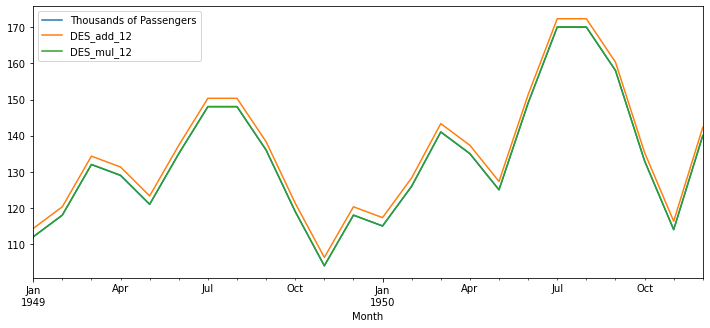

In [140]:
df2[['Thousands of Passengers', 'DES_add_12', 'DES_mul_12']].iloc[:24].plot(figsize=(12,5))

Triple exponential smoothing (Holt-Winters method) accounts for seasonality where the update equation contains a mix of additive and/or mulitplicative components for trend and seasonality.  Seasonality gets affected by a gamma variable and is recomputed every cycle (however long a cycle may be). 

In [141]:
df2['TES_mul_12'] = ExponentialSmoothing(df2['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit().fittedvalues

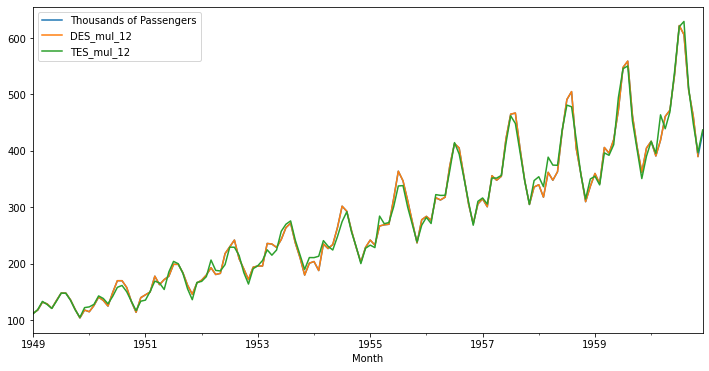

In [144]:
df2[['Thousands of Passengers', 'DES_mul_12', 'TES_mul_12']].plot(figsize=(12, 6))

Simpler models perform better on short-term analysis, however more complex models fit better to long-term trends to see the fluctuating seasonal pattern for more robust forecasting.